In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cricket-data-set/matches.csv
/kaggle/input/cricket-data-set/deliveries.csv


In [2]:
# Explanatory Data Analysis Sports #
# Indian Premium League Data#
#Importing Libraries#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
#Loading and reading data set #
df_matches = pd.read_csv("/kaggle/input/cricket-data-set/matches.csv")
df_deliveries = pd.read_csv("/kaggle/input/cricket-data-set/deliveries.csv")
print(df_matches.head())
print(df_deliveries.head())


   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

In [4]:
#Analyzing the data #
#Shape of the data #
df_matches.shape

(756, 18)

In [5]:
df_deliveries.shape


(179078, 21)

In [6]:
#More details about data set#
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
# Describing the data set#
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
df_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [10]:
#Checking Columns#
df_matches.columns.tolist()


['id',
 'season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [11]:
df_deliveries.columns.tolist()

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

**Checking Missing Values**

In [12]:

df_matches.isnull().sum()


id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [13]:
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

**Duplicate Values**

In [14]:
df_matches.nunique()


id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [15]:
df_deliveries.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

**Explanatory Data Analysis**

***Univariate Analysis***

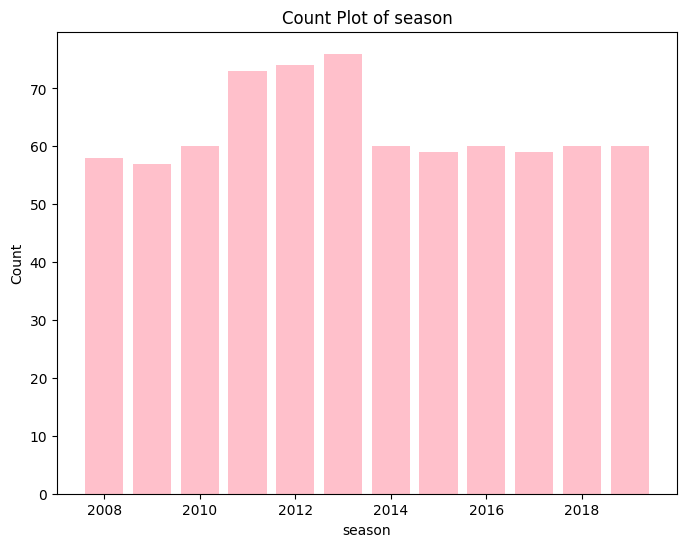

In [16]:
# Using Matplotlib to create a count plot#
#Season with most number of matches
season_count = df_matches['season'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(season_count.index, season_count, color='Pink')
plt.title('Count Plot of season')
plt.xlabel('season')
plt.ylabel('Count')
plt.show()

According to the data 2013 had most matches.

**Who won the toss most?**
***lets see which team mostly won the toss. **

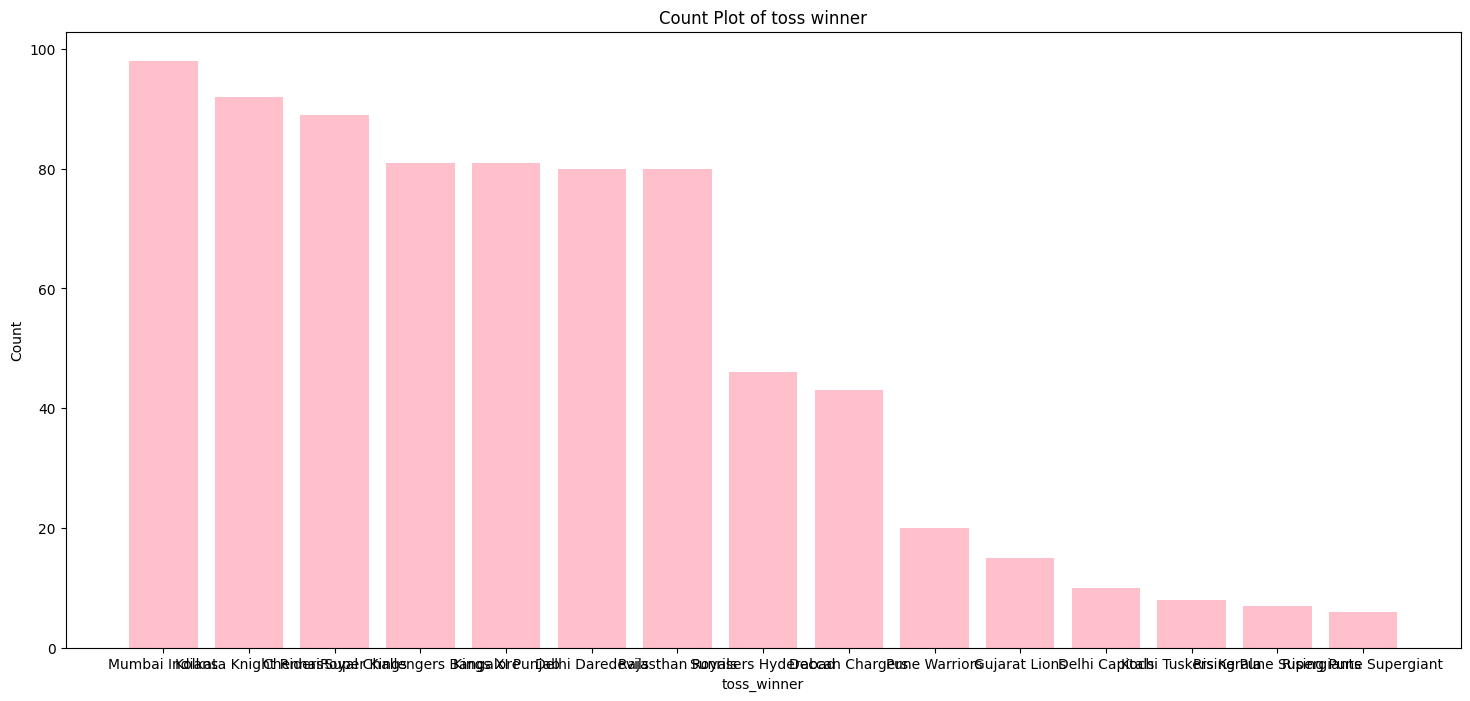

In [17]:
toss_winner_count = df_matches['toss_winner'].value_counts()

plt.figure(figsize=(18, 8))
plt.bar(toss_winner_count.index,toss_winner_count , color='Pink')
plt.title('Count Plot of toss winner')
plt.xlabel('toss_winner')
plt.ylabel('Count')
plt.show()

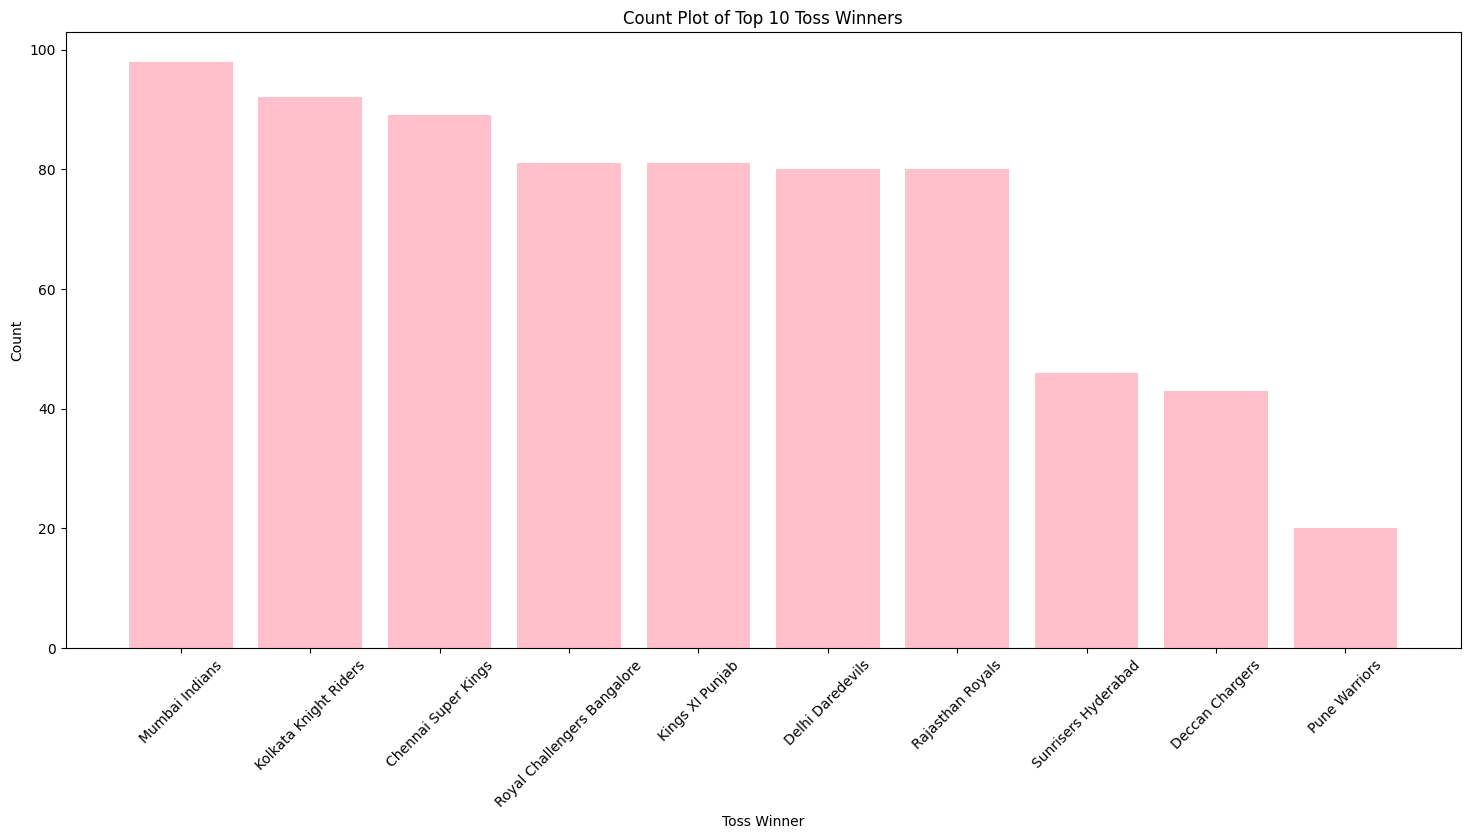

In [18]:

toss_winner_count = df_matches['toss_winner'].value_counts()

# Get the top 10 toss winners
top_10_toss_winners = toss_winner_count.head(10)

# Plot the top 10 toss winners
plt.figure(figsize=(18, 8))
plt.bar(top_10_toss_winners.index, top_10_toss_winners, color='Pink')
plt.title('Count Plot of Top 10 Toss Winners')
plt.xlabel('Toss Winner')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Mumbai Indians has moslty won the tosses.

**Toss Decision**
It is apparent from bar chart that most of tosses end up in field decisions.

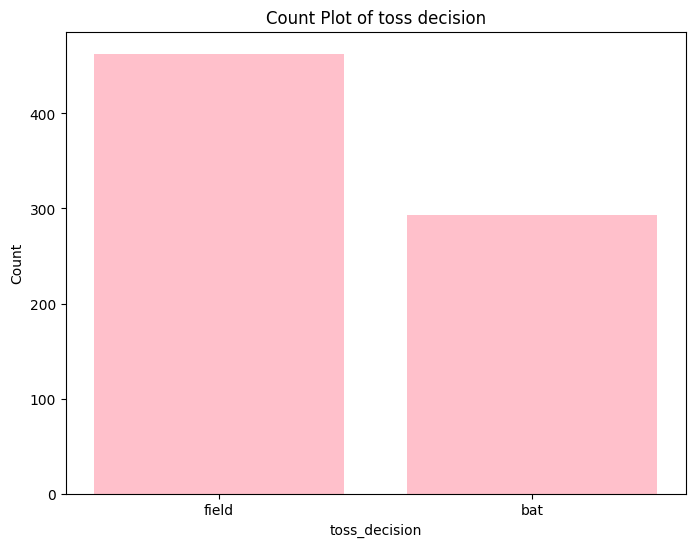

In [19]:
 #Using Matplotlib to create a count plot#
toss_decision_count = df_matches['toss_decision'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(toss_decision_count.index, toss_decision_count, color='Pink')
plt.title('Count Plot of toss decision')
plt.xlabel('toss_decision')
plt.ylabel('Count')
plt.show()

**Winner**

***Which team won most matches?***

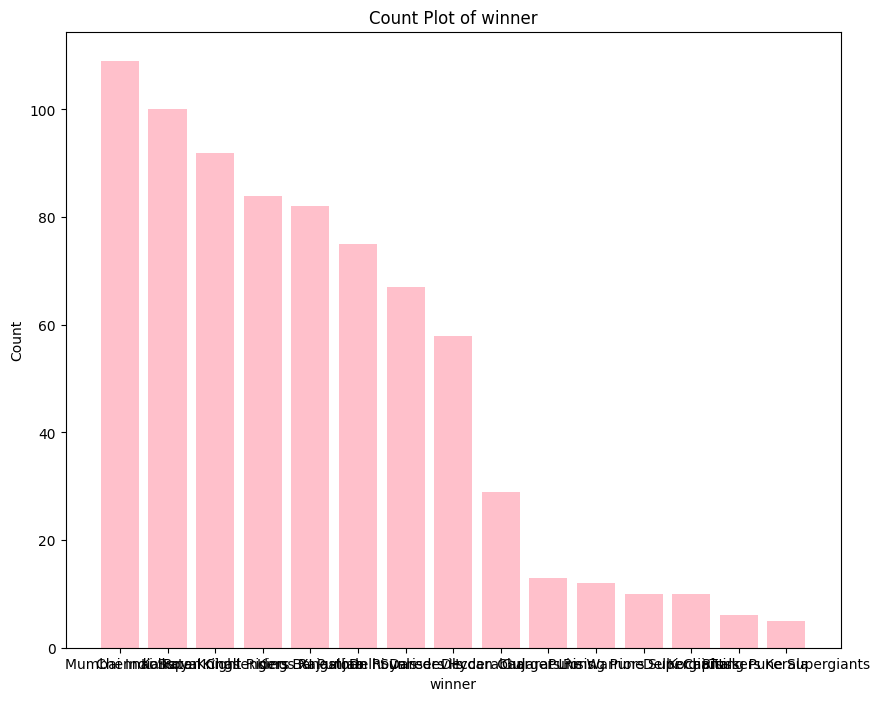

In [20]:
winner_count = df_matches['winner'].value_counts()

plt.figure(figsize=(10, 8))
plt.bar(winner_count.index, winner_count, color='Pink')
plt.title('Count Plot of winner')
plt.xlabel('winner')
plt.ylabel('Count')
plt.show()

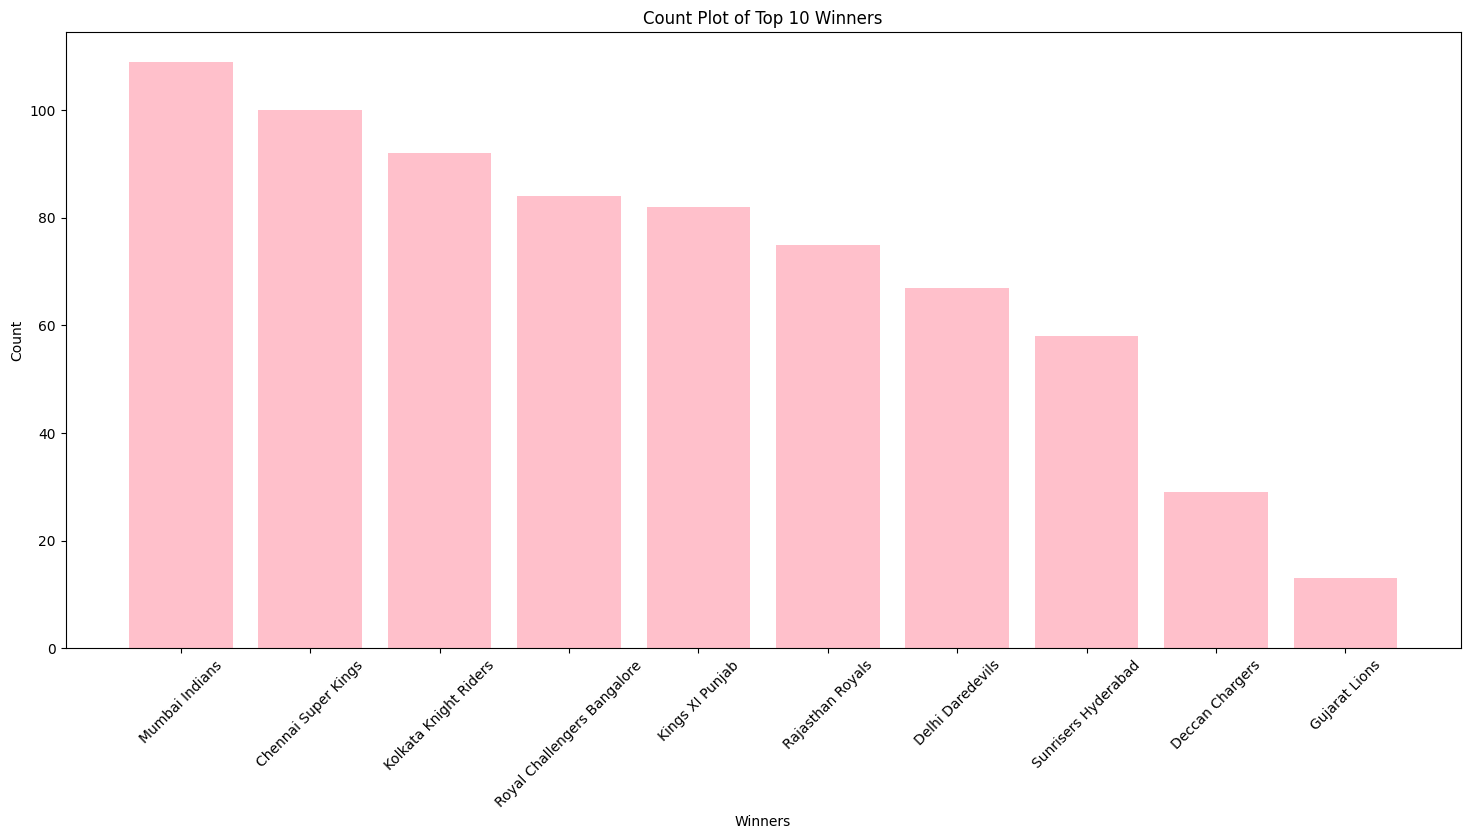

In [21]:

winners_count = df_matches['winner'].value_counts()

# Get the top 10 toss winners
top_10_winners = winners_count.head(10)

# Plot the top 10 toss winners
plt.figure(figsize=(18, 8))
plt.bar(top_10_winners.index, top_10_winners, color='Pink')
plt.title('Count Plot of Top 10 Winners')
plt.xlabel('Winners')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Mumbai Indians has won most matches among all teams.

**Player of the match**


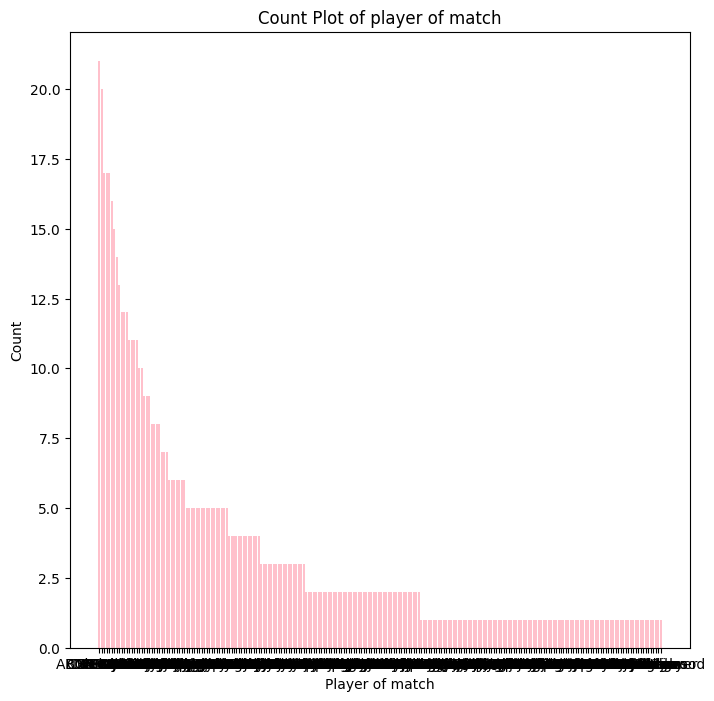

In [22]:
player_of_match_count = df_matches['player_of_match'].value_counts()

plt.figure(figsize=(8, 8))
plt.bar(player_of_match_count.index, player_of_match_count, color='Pink')
plt.title('Count Plot of player of match')
plt.xlabel('Player of match')
plt.ylabel('Count')
plt.show()

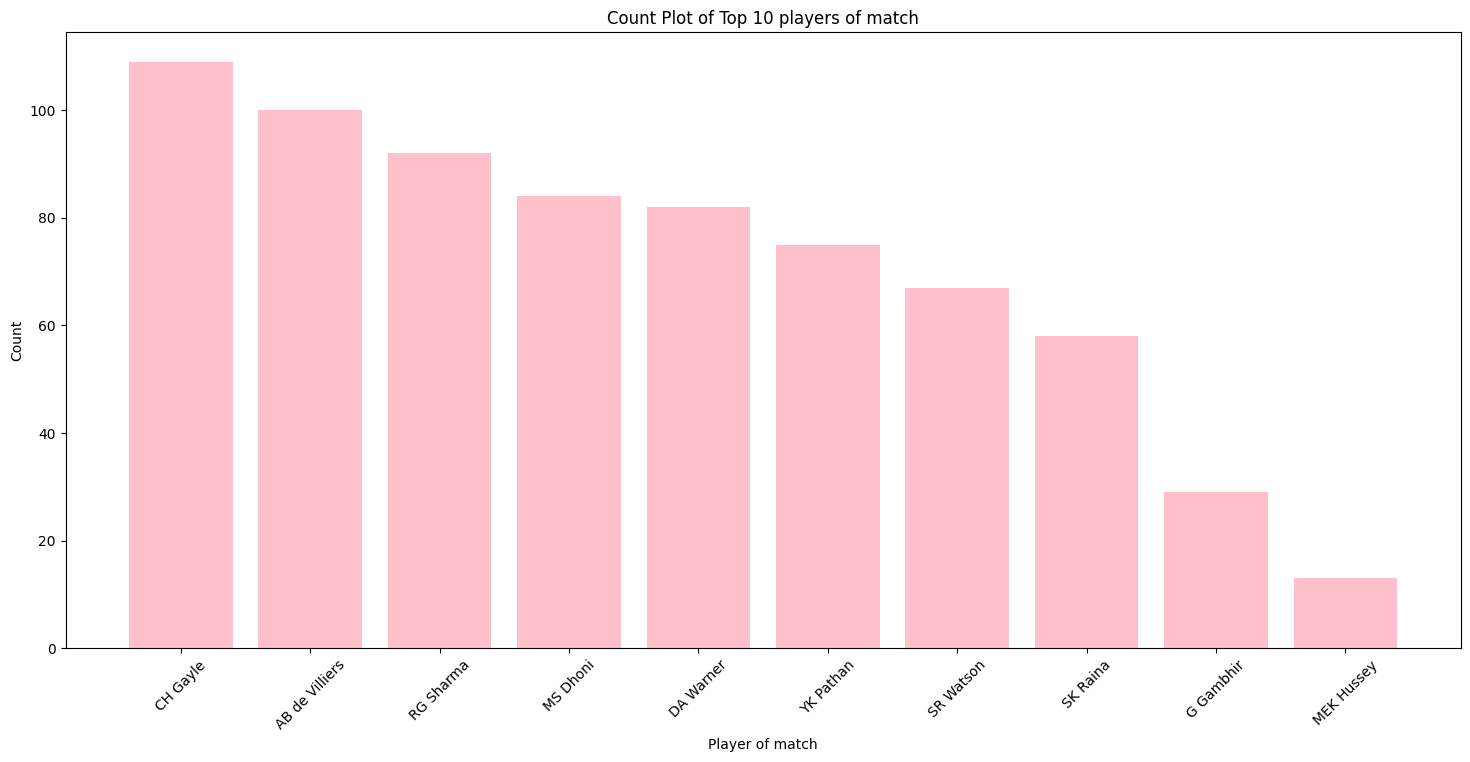

In [23]:

player_of_match_count = df_matches['player_of_match'].value_counts()

# Get the top 10 toss winners
top_10_player_of_match = player_of_match_count.head(10)

# Plot the top 10 toss winners
plt.figure(figsize=(18, 8))
plt.bar(top_10_player_of_match.index, top_10_winners, color='Pink')
plt.title('Count Plot of Top 10 players of match')
plt.xlabel('Player of match')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

CH Gayle won player of the match title the most.

**Number of matches in each venue**

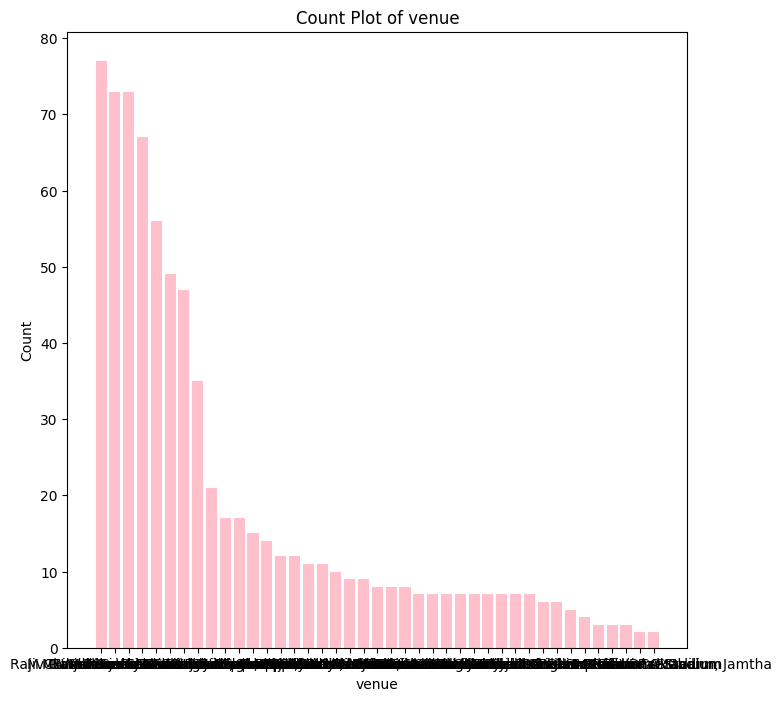

In [24]:
venue_count = df_matches['venue'].value_counts()

plt.figure(figsize=(8, 8))
plt.bar(venue_count.index, venue_count, color='Pink')
plt.title('Count Plot of venue')
plt.xlabel('venue')
plt.ylabel('Count')
plt.show()

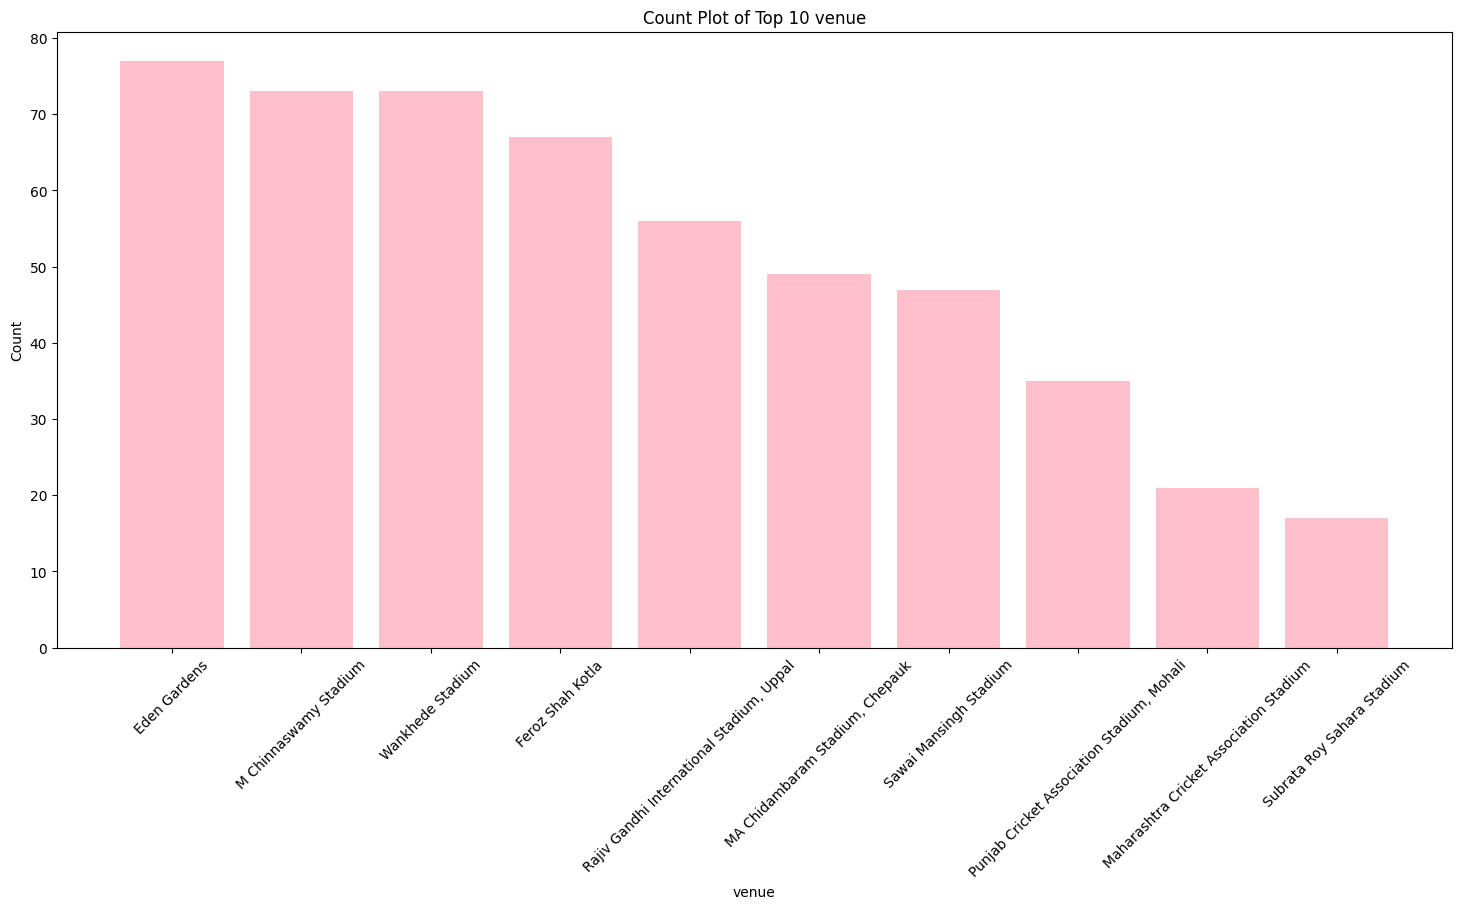

In [25]:

venue_count = df_matches['venue'].value_counts()

# Get the top 10 toss winners
top_10_venue = venue_count.head(10)

# Plot the top 10 toss winners
plt.figure(figsize=(18, 8))
plt.bar(top_10_venue.index, top_10_venue, color='Pink')
plt.title('Count Plot of Top 10 venue')
plt.xlabel('venue')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Out of all the venues, Eden Gardens had most matches.

**Number of matches played by each team**

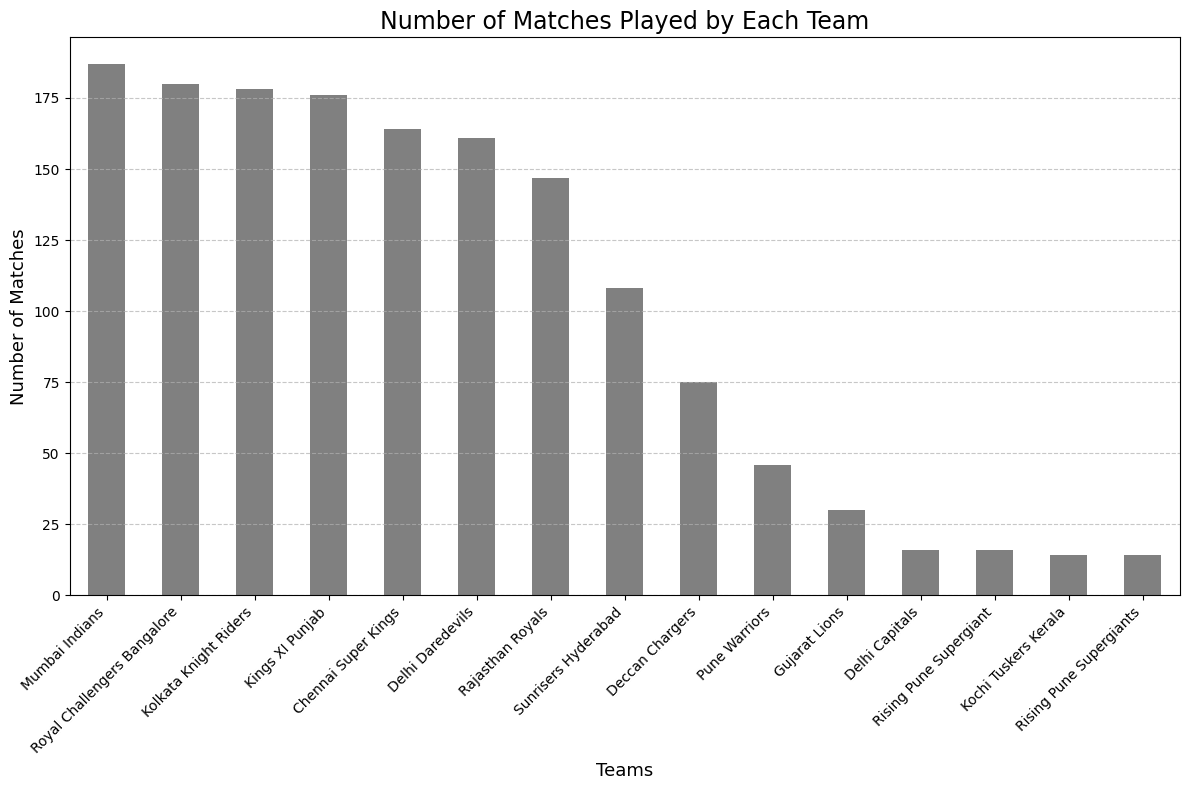

In [26]:
# First Step#
# We have to find the number of matches played by each team#
team1_matches_count = df_matches['team1'].value_counts()
team2_matches_count = df_matches['team2'].value_counts()

# Seond Step#
# Find the total matches played by each team by summing the counts from both column#
total_matches_count = team1_matches_count.add(team2_matches_count, fill_value=0).astype(int)

#Third Step#
#Visualuzation#
plt.figure(figsize=(12, 8))
total_matches_count.sort_values(ascending=False).plot(kind='bar', color= 'grey')
plt.title('Number of Matches Played by Each Team', fontsize=17)
plt.xlabel('Teams', fontsize=13)
plt.ylabel('Number of Matches', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

**Umpire 1**

The below graphs shows that HDPK Dharmasena was Umpire 1 in the most matches.

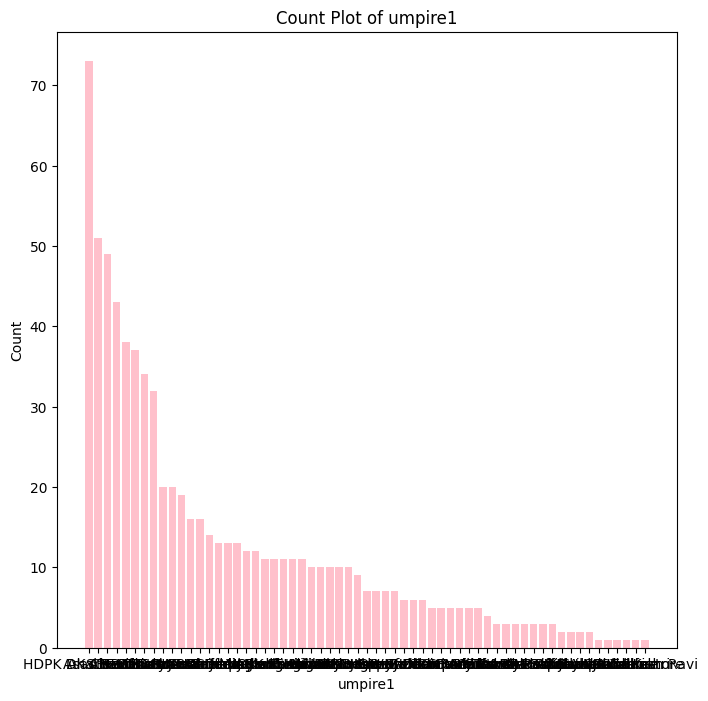

In [27]:
umpire1_count = df_matches['umpire1'].value_counts()

plt.figure(figsize=(8, 8))
plt.bar(umpire1_count.index, umpire1_count, color='Pink')
plt.title('Count Plot of umpire1')
plt.xlabel('umpire1')
plt.ylabel('Count')
plt.show()

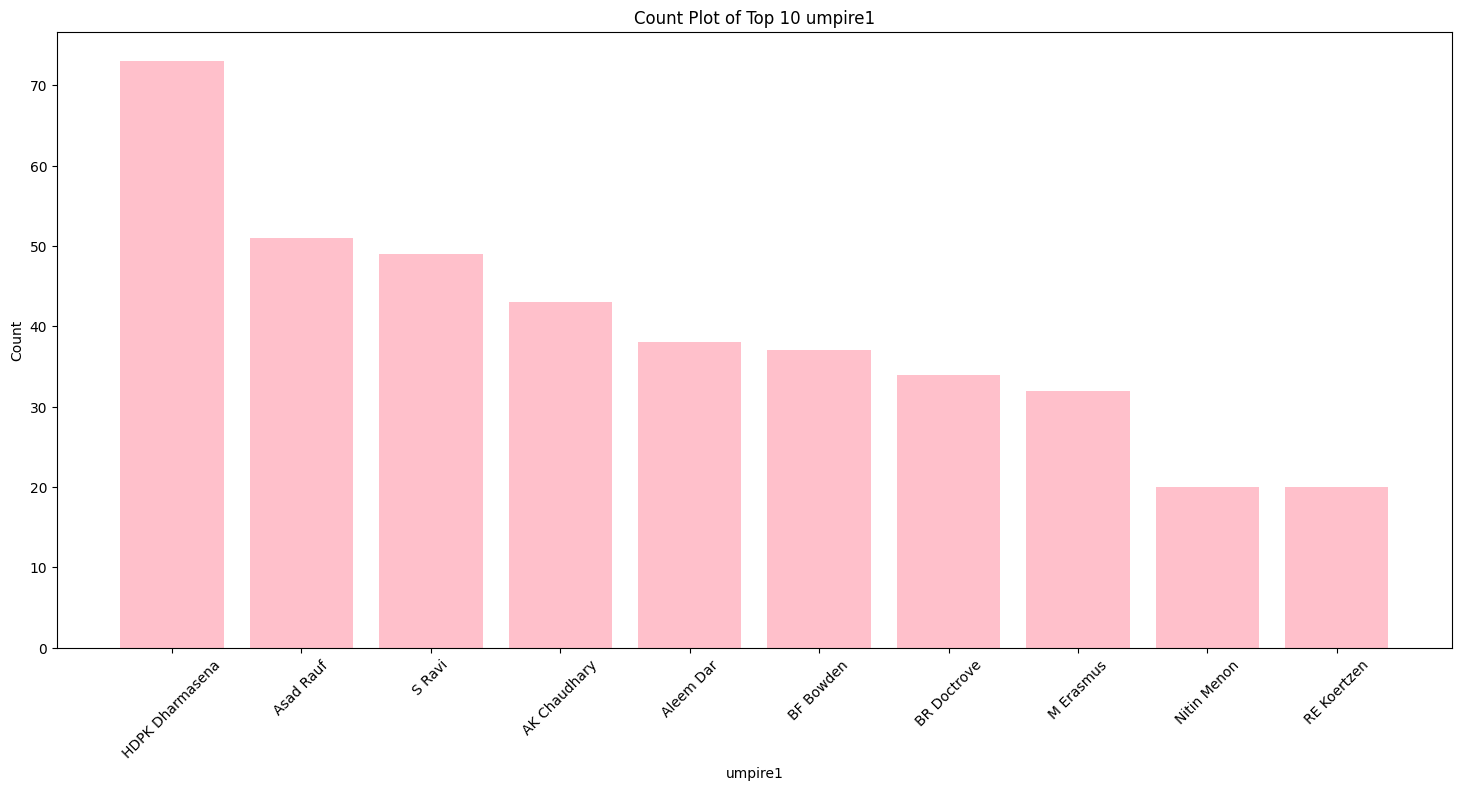

In [28]:

umpire1_count = df_matches['umpire1'].value_counts()

# Get the top 10 toss winners
top_10_umpire1 = umpire1_count.head(10)

# Plot the top 10 toss winners
plt.figure(figsize=(18, 8))
plt.bar(top_10_umpire1.index, top_10_umpire1, color='Pink')
plt.title('Count Plot of Top 10 umpire1')
plt.xlabel('umpire1')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Umpire 2**

C Shamshuddin was umpire 2 in most of the matches.

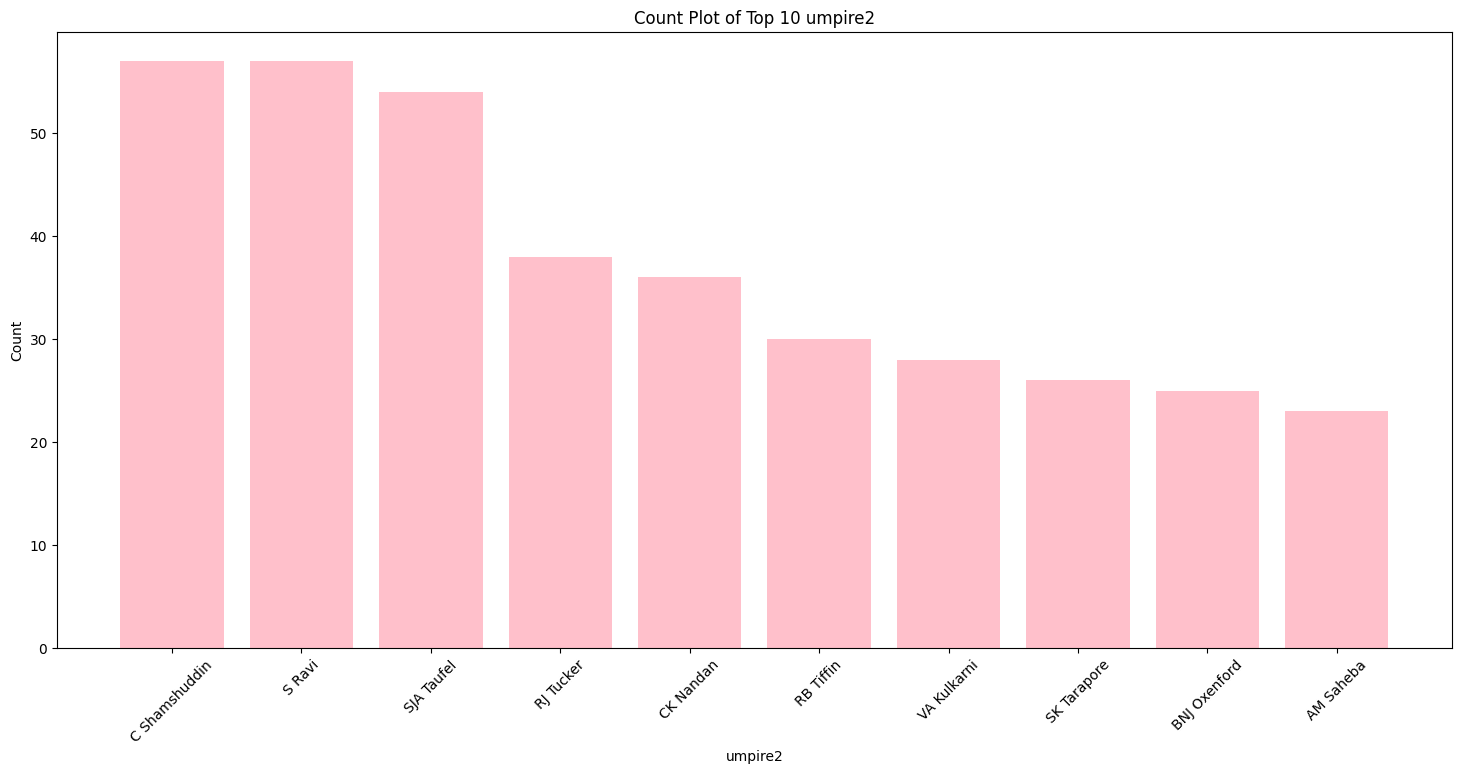

In [29]:

umpire2_count = df_matches['umpire2'].value_counts()

# Get the top 10 toss winners
top_10_umpire2 = umpire2_count.head(10)

# Plot the top 10 toss winners
plt.figure(figsize=(18, 8))
plt.bar(top_10_umpire2.index, top_10_umpire2, color='Pink')
plt.title('Count Plot of Top 10 umpire2')
plt.xlabel('umpire2')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Umpire 3**

Nitin Menon was umpire 3 in most of the matches.

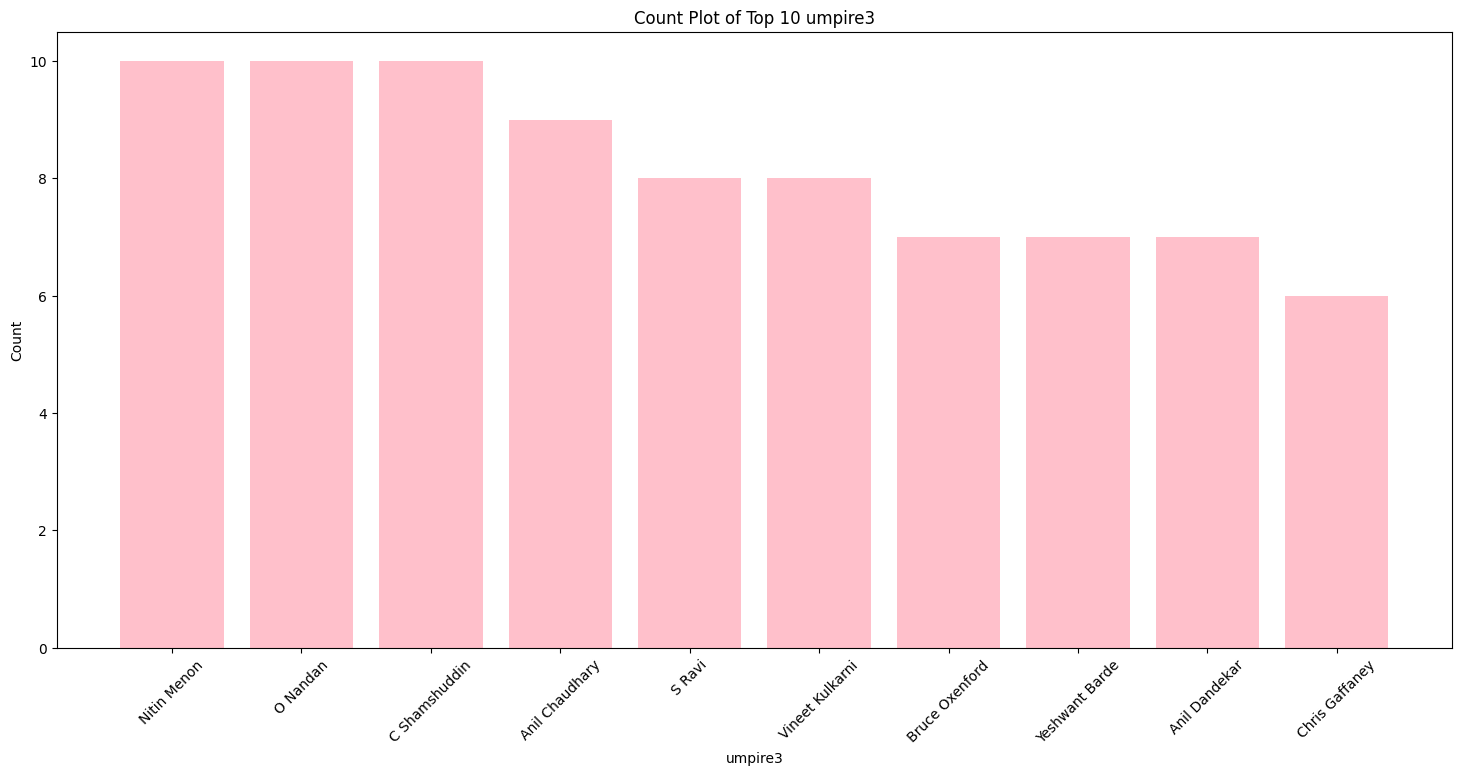

In [30]:

umpire3_count = df_matches['umpire3'].value_counts()

# Get the top 10 toss winners
top_10_umpire3 = umpire3_count.head(10)

# Plot the top 10 toss winners
plt.figure(figsize=(18, 8))
plt.bar(top_10_umpire3.index, top_10_umpire3, color='Pink')
plt.title('Count Plot of Top 10 umpire3')
plt.xlabel('umpire3')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

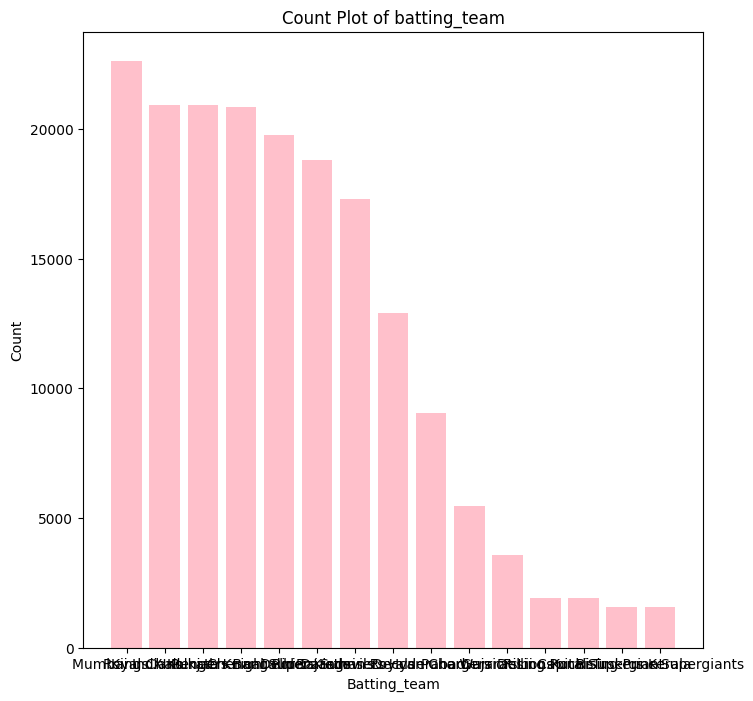

In [31]:
#Univariate analysis deliveries#
batting_team_count = df_deliveries['batting_team'].value_counts()

plt.figure(figsize=(8, 8))
plt.bar(batting_team_count.index, batting_team_count, color='Pink')
plt.title('Count Plot of batting_team')
plt.xlabel('Batting_team')
plt.ylabel('Count')
plt.show()



**Batting team**

Mumbai Indians has played most matches.

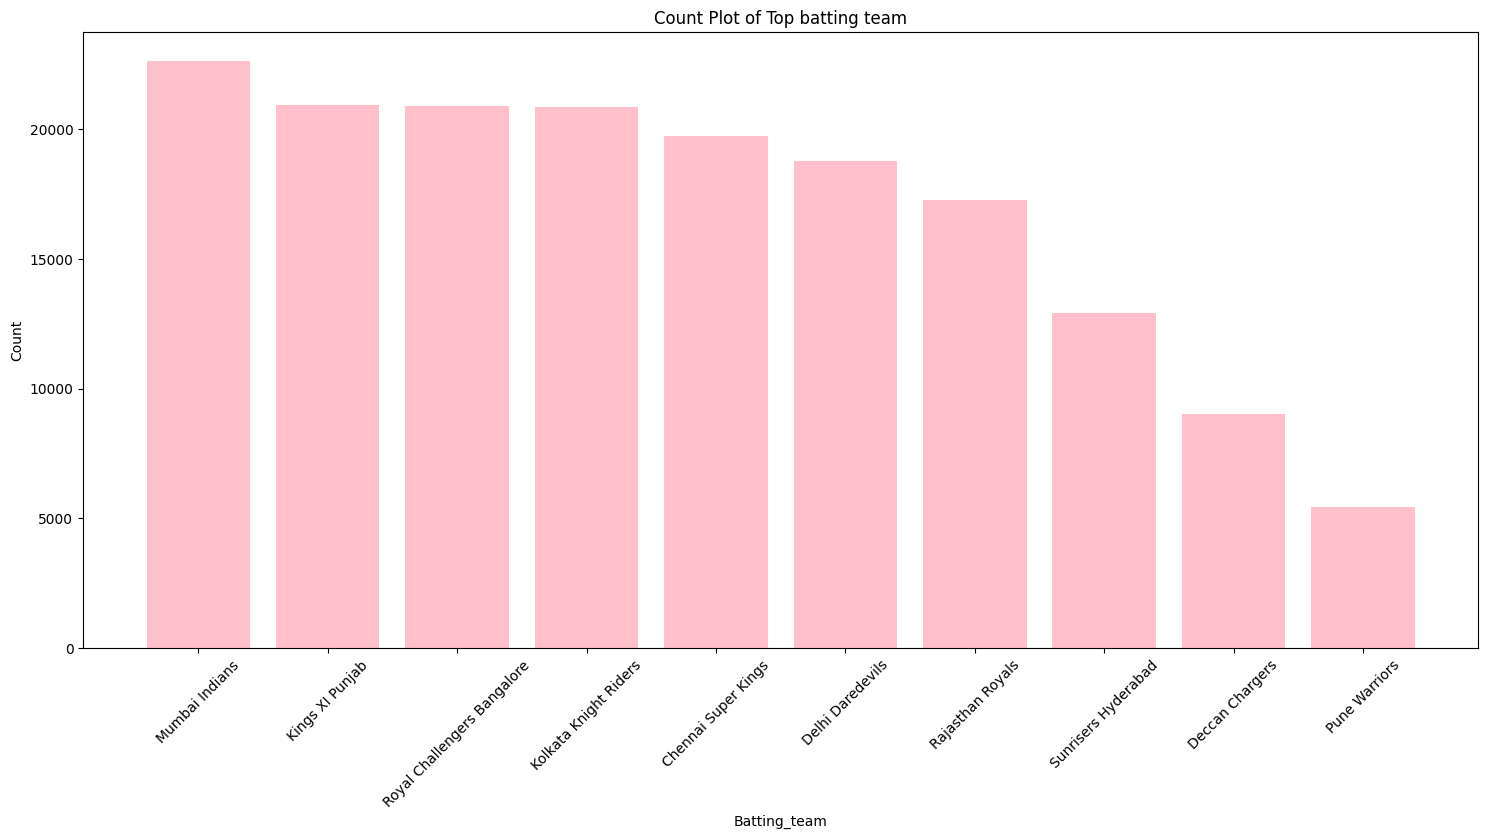

In [32]:
batting_team_count = df_deliveries['batting_team'].value_counts()


top_10_batting_team = batting_team_count.head(10)

plt.figure(figsize=(18, 8))
plt.bar(top_10_batting_team.index, top_10_batting_team, color='Pink')
plt.title('Count Plot of Top batting team')
plt.xlabel('Batting_team')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Bowling team**

Like expected Mumbai Indians bowling team came first.

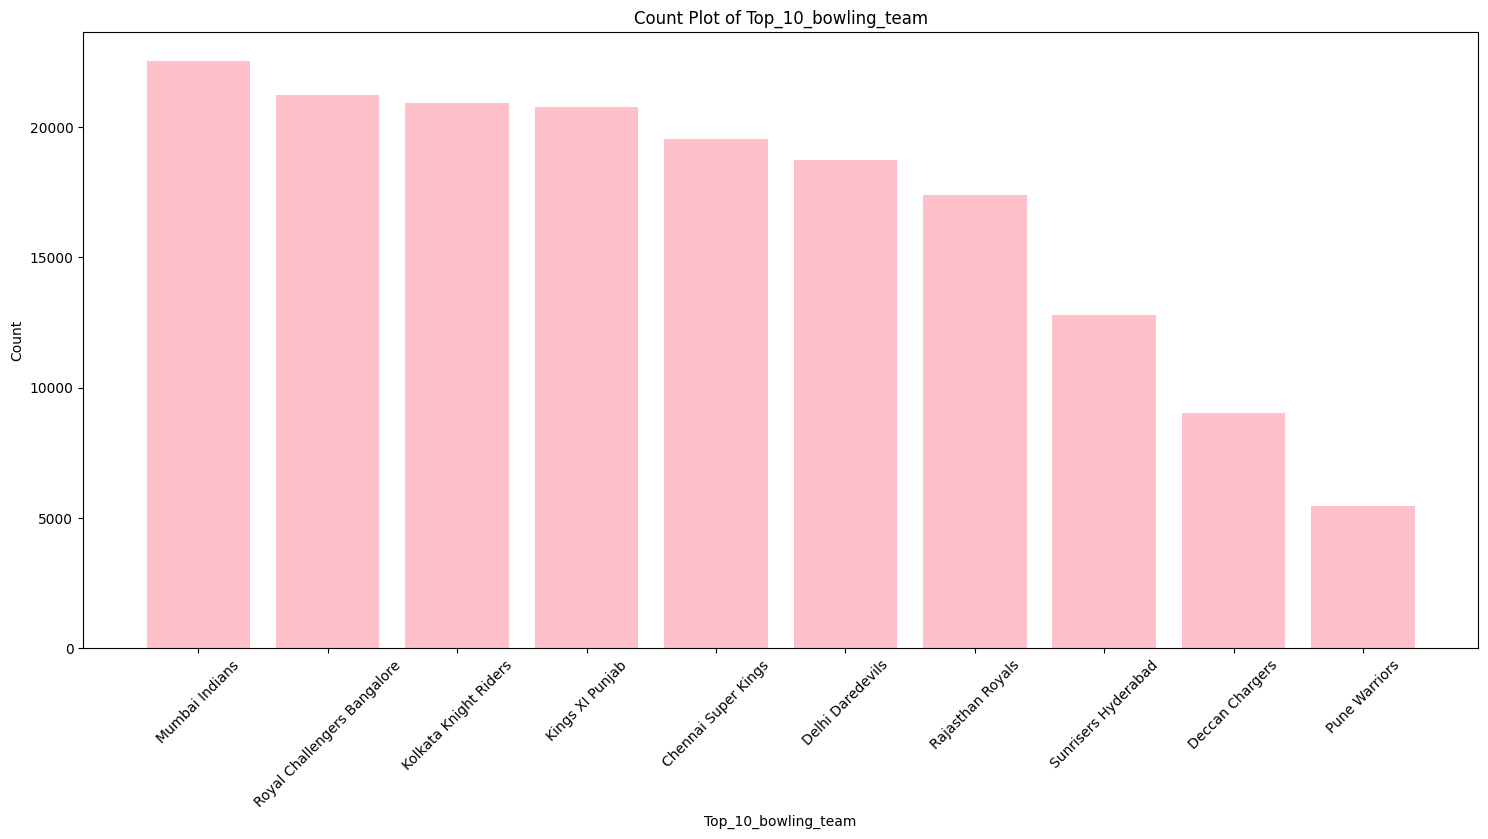

In [33]:
bowling_team_count = df_deliveries['bowling_team'].value_counts()


top_10_bowling_team = bowling_team_count.head(10)

plt.figure(figsize=(18, 8))
plt.bar(top_10_bowling_team.index, top_10_bowling_team, color='Pink')
plt.title('Count Plot of Top_10_bowling_team')
plt.xlabel('Top_10_bowling_team')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Team won most matches**

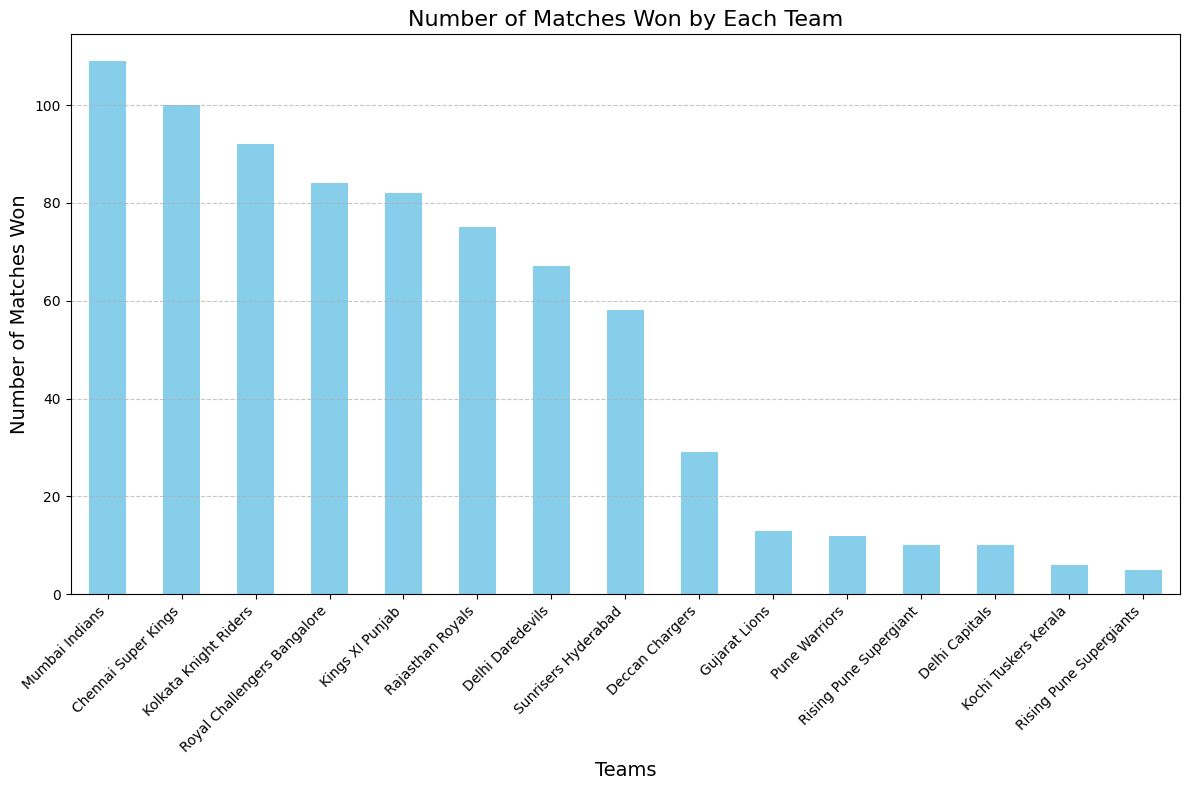

In [34]:
winner_count = df_matches['winner'].value_counts()

# Plotting the results
plt.figure(figsize=(12, 8))
winner_count.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of Matches Won by Each Team', fontsize=16)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Number of Matches Won', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

In [35]:
#Team won by Maximum runs #

In [36]:
# Find the row with the maximum value in 'win_by_runs'
max_win_by_runs_row = df_matches.loc[df_matches['win_by_runs'].idxmax()]

# Extract the team that won by the maximum runs
team_won_by_max_runs = max_win_by_runs_row['winner']
max_runs = max_win_by_runs_row['win_by_runs']

print(f"The team that won by the maximum number of runs is {team_won_by_max_runs} with a margin of {max_runs} runs.")

The team that won by the maximum number of runs is Mumbai Indians with a margin of 146 runs.


In [37]:
#Team won by Minimum runs#

In [38]:
# Filter out rows where 'win_by_runs' is 0
win_by_runs_non_zero = df_matches[df_matches['win_by_runs'] > 0]

# Find the row with the minimum value in 'win_by_runs'
min_win_by_runs_row = win_by_runs_non_zero.loc[win_by_runs_non_zero['win_by_runs'].idxmin()]

# Extract the team that won by the minimum runs
team_won_by_min_runs = min_win_by_runs_row['winner']
min_runs = min_win_by_runs_row['win_by_runs']

print(f"The team that won by the minimum number of runs is {team_won_by_min_runs} with a margin of {min_runs} runs.")

The team that won by the minimum number of runs is Mumbai Indians with a margin of 1 runs.


In [39]:
#Team won by maximum wickets#


In [40]:

win_by_max_wickets_row = df_matches.loc[df_matches['win_by_wickets'].idxmax()]
team_won_by_max_wickets = win_by_max_wickets_row['winner']
max_wickets = win_by_max_wickets_row['win_by_wickets']
print(f"The team that won by the maximum number of wickets is {team_won_by_max_wickets} with a margin of {max_wickets} wickets.")

The team that won by the maximum number of wickets is Kolkata Knight Riders with a margin of 10 wickets.


In [41]:
#Team won by minimum wickets#


In [42]:
win_by_min_wickets_row = df_matches.loc[df_matches['win_by_wickets'].idxmin()]
team_won_by_min_wickets = win_by_min_wickets_row['winner']
min_wickets = win_by_min_wickets_row['win_by_wickets']
print(f"The team that won by the minimum number of wickets is {team_won_by_min_wickets} with a margin of {min_wickets} wickets.")

The team that won by the minimum number of wickets is Sunrisers Hyderabad with a margin of 0 wickets.


**Deliveries data set**

In [43]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [44]:
df_deliveries.columns.tolist()

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

**Total runs by batting team**

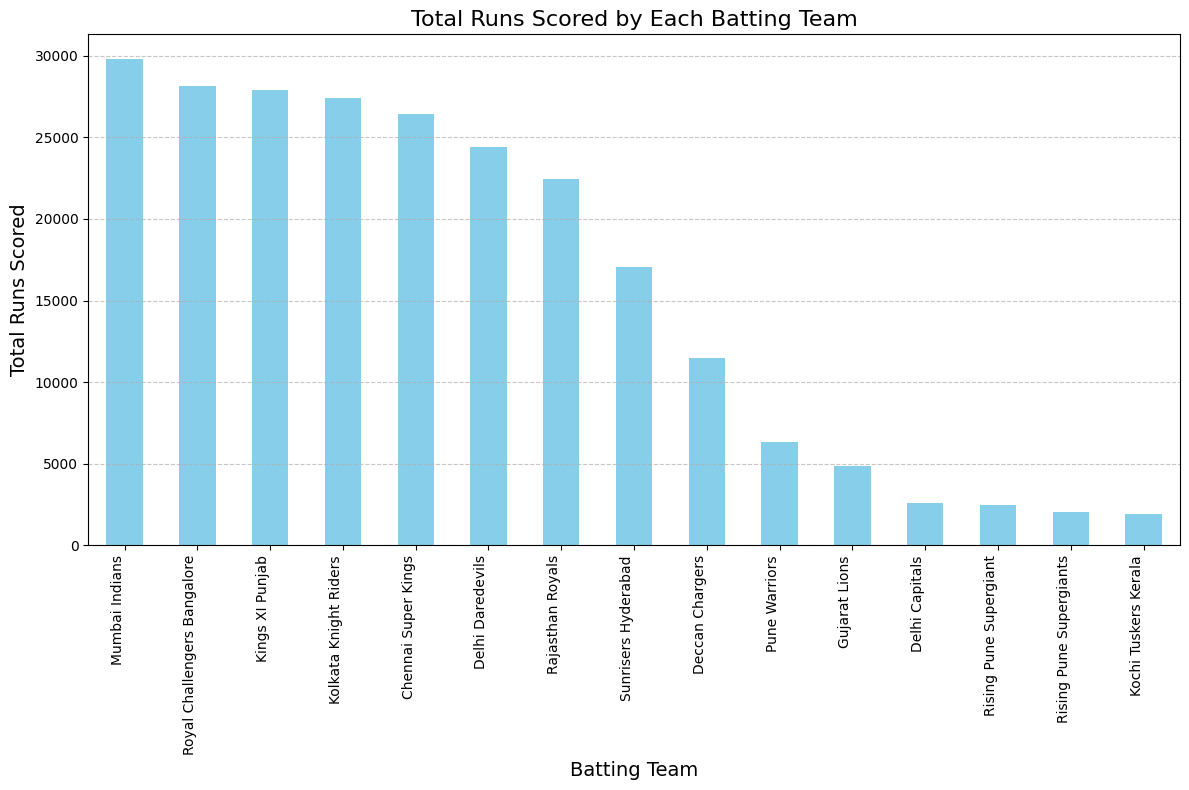

In [45]:
runs_by_batting_team = df_deliveries.groupby('batting_team')['total_runs'].sum()

# Sort the results in descending order
runs_by_batting_team_sorted = runs_by_batting_team.sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(12, 8))
runs_by_batting_team_sorted.plot(kind='bar', color='skyblue')
plt.title('Total Runs Scored by Each Batting Team', fontsize=16)
plt.xlabel('Batting Team', fontsize=14)
plt.ylabel('Total Runs Scored', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

**Which batsman made most runs?**

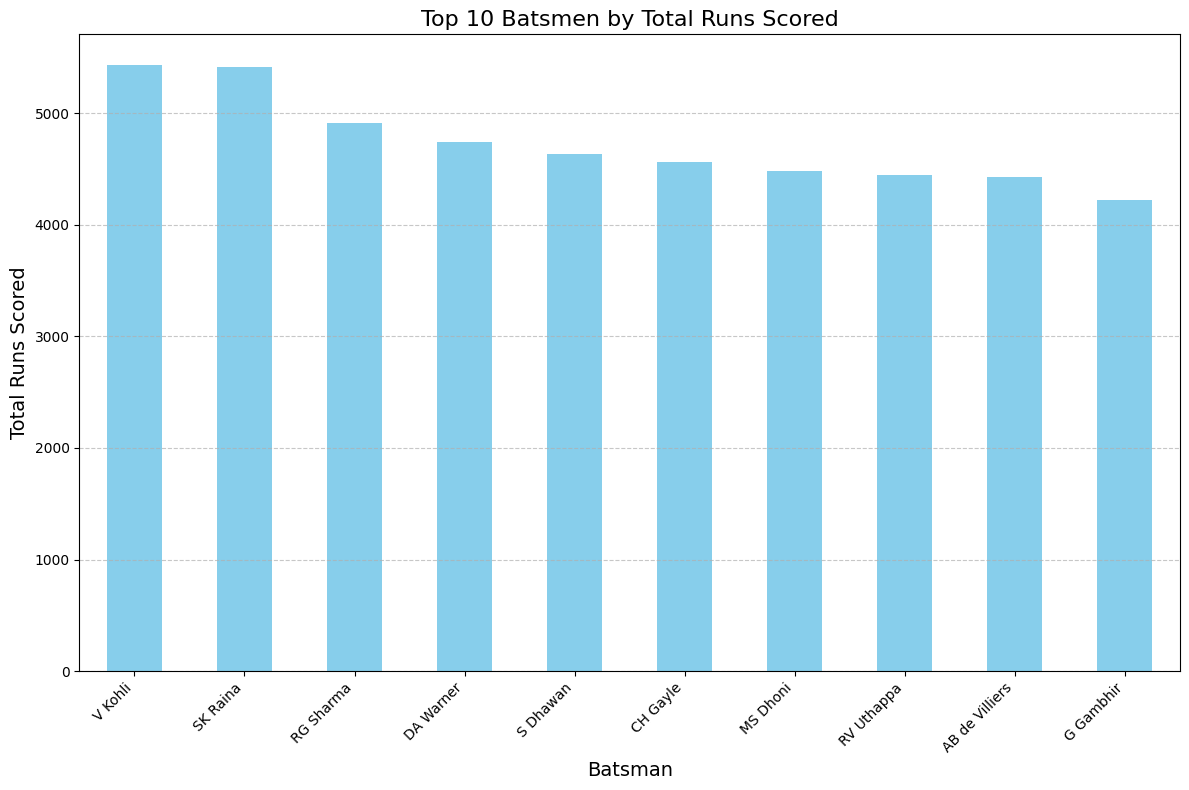

In [46]:
# Group by 'batsman' and sum the 'batsman_runs' for each batsman
runs_by_batsman = df_deliveries.groupby('batsman')['batsman_runs'].sum()

# Sort the results in descending order
runs_by_batsman_sorted = runs_by_batsman.sort_values(ascending=False)

# Select the top 10 batsmen
top_10_batsmen = runs_by_batsman_sorted.head(10)

# Plotting the results
plt.figure(figsize=(12, 8))
top_10_batsmen.plot(kind='bar', color='skyblue')
plt.title('Top 10 Batsmen by Total Runs Scored', fontsize=16)
plt.xlabel('Batsman', fontsize=14)
plt.ylabel('Total Runs Scored', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

**Which bowler had least no ball runs?**

The bowler with the least no-ball runs is SN Khan with 0 no-ball runs.


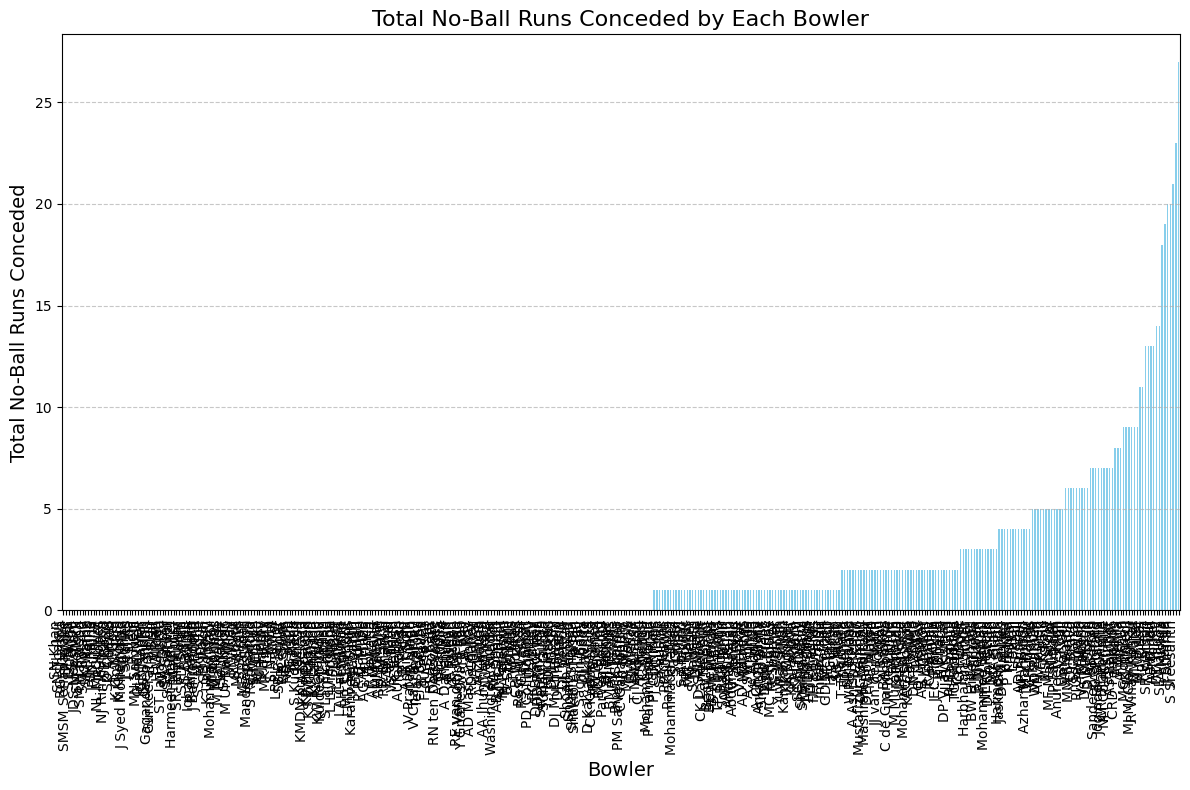

In [47]:

# Group by 'bowler' and sum the 'noball_runs' for each bowler
noball_runs_by_bowler = df_deliveries.groupby('bowler')['noball_runs'].sum()

# Sort the results in ascending order to find the bowler with the least no-ball runs
noball_runs_by_bowler_sorted = noball_runs_by_bowler.sort_values()

# Get the bowler with the least no-ball runs
bowler_least_noballs = noball_runs_by_bowler_sorted.idxmin()
least_noballs_runs = noball_runs_by_bowler_sorted.min()

print(f"The bowler with the least no-ball runs is {bowler_least_noballs} with {least_noballs_runs} no-ball runs.")

# Plotting the results
plt.figure(figsize=(12, 8))
noball_runs_by_bowler_sorted.plot(kind='bar', color='skyblue')
plt.title('Total No-Ball Runs Conceded by Each Bowler', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Total No-Ball Runs Conceded', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the bowler with the least no-ball runs
highlight_index = noball_runs_by_bowler_sorted.index.get_loc(bowler_least_noballs)
plt.bar(highlight_index, least_noballs_runs, color='red')

plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

**The bowler with the least no-ball runs is SN Khan with 0 no-ball runs.**

***THANK YOU***